In [ ]:
!pip install accelerate bitsandbytes watermark

In [ ]:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

In [ ]:


%load_ext watermark
%watermark --conda -p torch,transformers,accelerate,bitsandbytes

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
# testing model 7b
tokenizer = AutoTokenizer.from_pretrained('google/gemma-7b',device_map="auto")
#since 7b can not be fit in gpu memory we can use bnb config to load the model
bnb_config = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.bfloat16)
model  = AutoModelForCausalLM.from_pretrained('google/gemma-7b',device_map="auto",quantization_config=bnb_config)


In [ ]:
tokenizer.apply_chat_template([{"role": "user", "content": "what can you do?"}],add_generation_prompt=True,tokenize=False)

In [ ]:
model.eval()

In [ ]:
def generate_text(text,tokenizer,model,max_new_tokens=20):
    inputs = tokenizer(text, return_tensors="pt").to("cuda:0")
    outputs = model.generate(**inputs, max_new_tokens=max_new_tokens)
    print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
generate_text("ફ્રાન્સની રાજધાની કઈ છે? answer",tokenizer,model,max_new_tokens=1000)

In [ ]:
model.train()

In [ ]:
model.gradient_checkpoint_enable() # memory saving techniques. that drop the activations and do the recompute when needed

In [ ]:
model = prepare_model_for_kbit_training(model)

In [ ]:
Lora config

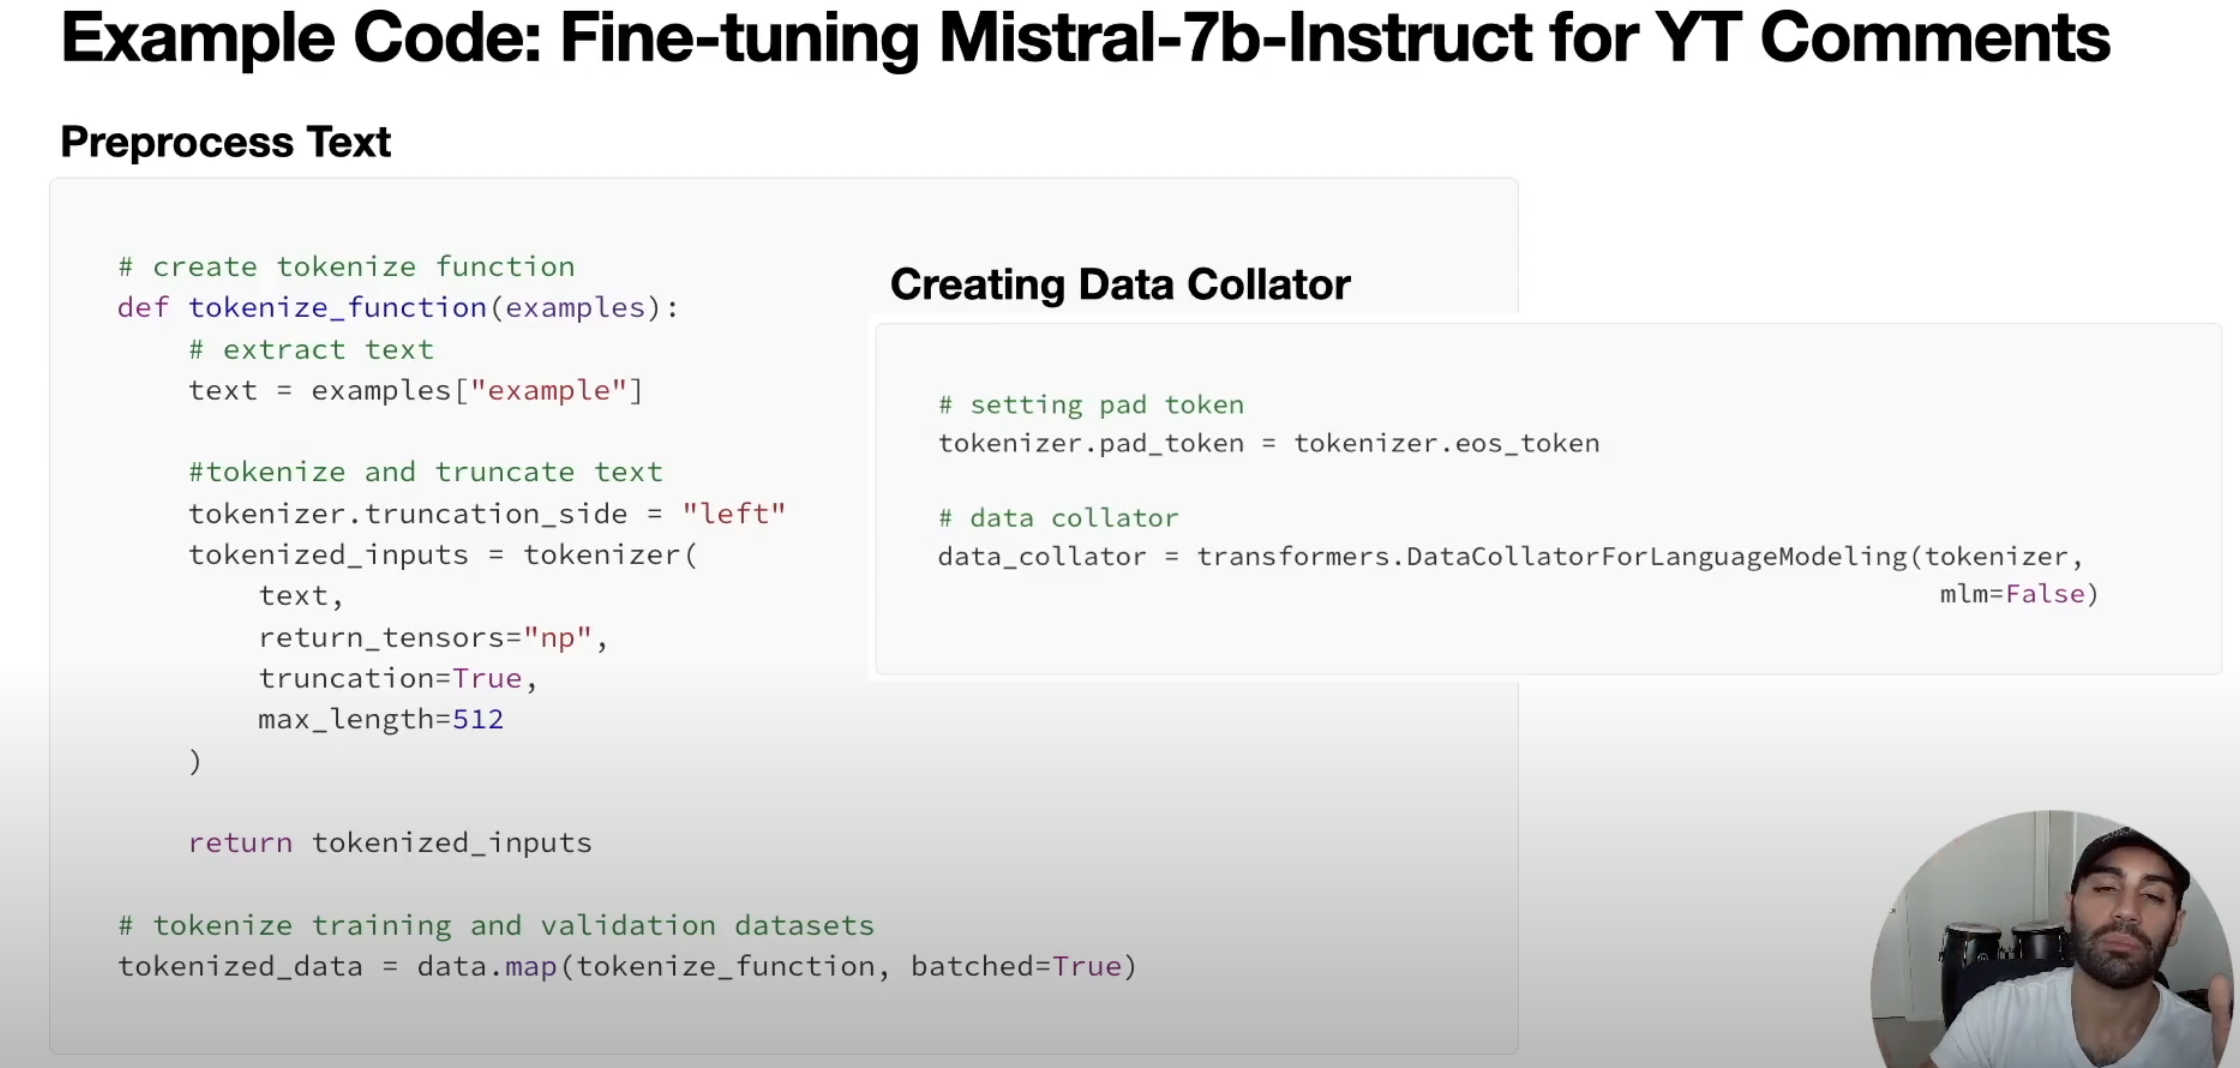


In [ ]:
mdodel.config.use_cache=False # silence for warnings

In [ ]:
What is data collator and use case in model tuning  